### ETUDE DES FACTEURS LIES AUX MALADIES CARDIO-VASCULAIRE

#### Le contexte

    Les maladies cardiovasculaires (MCV) sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui représente 31 % de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à  des crises cardiaques et Ã  des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. L'insuffisance cardiaque est un évènement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque.

    Les personnes atteintes de maladies cardiovasculaires ou Ã  haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà  établie) ont besoin d'une détection et d'une gestion précoces dans lesquelles un modèle d'apprentissage automatique peut être d'une grande aide.



#### Informations sur les attributs du dataset

    AGE : âge du patient 
    SEXE: sexe du patient [homme, femme]
    TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, 
                                      ASY : asymptomatique]
    PAR : pression artérielle au repos [mm Hg]
    CHOLESTEROL : cholestérol sérique [mm/dl]
    GAJ : glycémie à  jeun [1 : si glycémie à  jeun > 120 mg/dl, 0 : sinon]
    ECG au repos : résultats de l'électrocardiogramme au repos [Normal : normal, 
                   ST : présentant une anomalie de l'onde ST-T , 
                   HVG : montrant une hypertrophie ventriculaire gauche probable]
    FCMAX : fréquence cardiaque maximale atteinte 
    ANGINE : angine induite par l'exercice [Oui, Non]
    DEPRESSION : Valeur numérique mesurée en dépression
    PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]
    COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

In [1]:
#importation librairies

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#chargement dataset

df=pd.read_excel('heart.xlsx')

In [3]:
#prévisualisation

df.head(8)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0


In [4]:
#sauvegarde du Dataset
df1=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
#Suppression de l'espace auprès du nom de la colonne
df.rename(columns={"DEPRESSION ": "DEPRESSION"},inplace=True)

       
       On Obtient un dataset de 918 lignes et 12 colonnes ne contenant pas de valeur manquantes et dont aucune lignes n'est dupliqués.
       l'étude portant sur le risque d'être atteint d'une maladie cardiaque suivant certains indcateurs, la variable cible   est donc la variable COEUR avec 1 : Présence de la maladie, 0 : Absence de la maladie

#### EDA

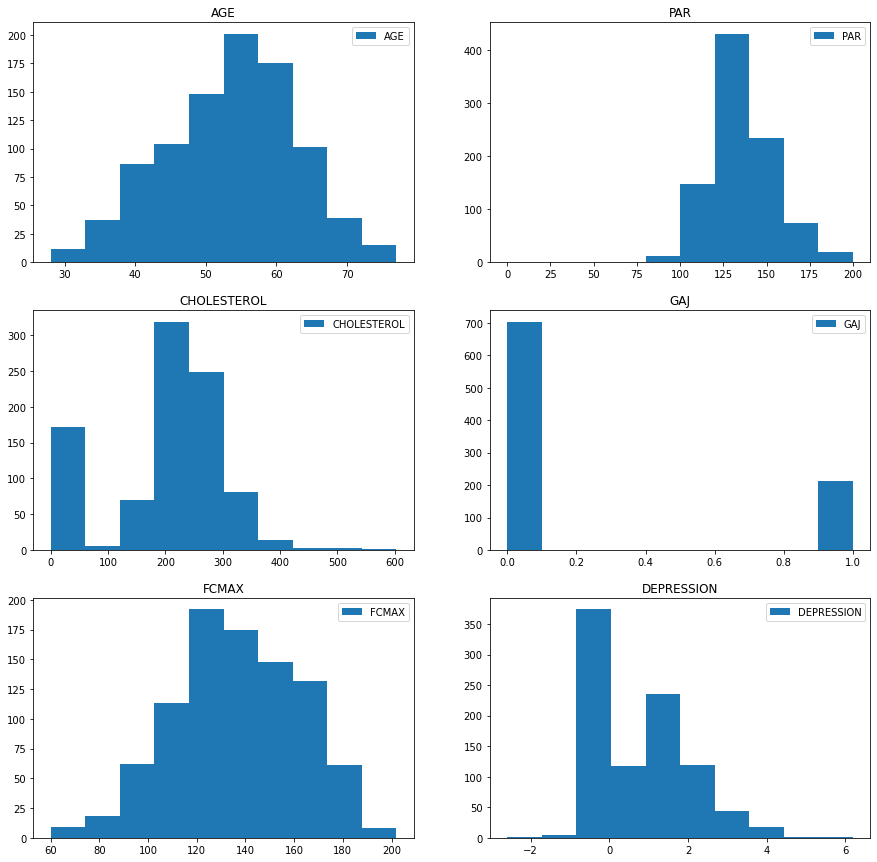

In [9]:
# Visualisation de la distribution des variables quantitatives
plt.rcParams["figure.figsize"] = 15, 15

fig, ax = plt.subplots(3, 2)

# 
ax[0, 0].hist(df.AGE, label = "AGE")
ax[0, 0].set_title("AGE", size = 12)
ax[0, 0].legend()

ax[0, 1].hist(df.PAR, label = "PAR")
ax[0, 1].set_title("PAR", size = 12)
ax[0, 1].legend()


# 
ax[1, 0].hist(df.CHOLESTEROL,label = "CHOLESTEROL")
ax[1, 0].set_title("CHOLESTEROL", size = 12)
ax[1, 0].legend()

ax[1, 1].hist(df.GAJ, label = "GAJ")
ax[1, 1].set_title("GAJ", size = 12)
ax[1, 1].legend()


# 
ax[2, 0].hist(df.FCMAX, label = "FCMAX")
ax[2, 0].set_title("FCMAX", size = 12)
ax[2, 0].legend()

ax[2, 1].hist(df.DEPRESSION, label = "DEPRESSION")
ax[2, 1].set_title("DEPRESSION", size = 12)
ax[2, 1].legend()

plt.show()

     
     On Observe l'essentiel de la population d'étude entre 35 et 75 ans, ce qui donne comprehension sur la population d'étude majoritairement Adulte

    la pression artérielle variant entre 100 et 178 mg/Hg avec une forte part de la population ayant une pression artérielle a 125 mg/Hg avec un taux de cholestérol moyen a 200 et des fréquences cardiaques variant globalement entre 80 et 190

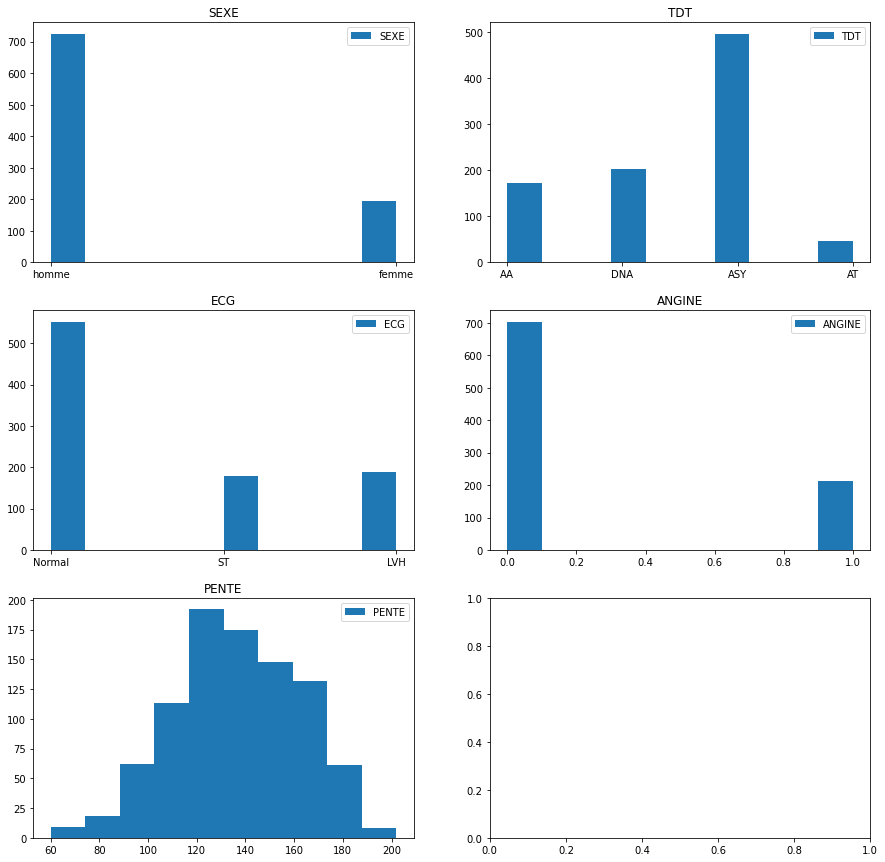

In [10]:
plt.rcParams["figure.figsize"] = 15, 15

fig, ax = plt.subplots(3, 2)

# 
ax[0, 0].hist(df.SEXE, label = "SEXE")
ax[0, 0].set_title("SEXE", size = 12)
ax[0, 0].legend()

ax[0, 1].hist(df.TDT, label = "TDT")
ax[0, 1].set_title("TDT", size = 12)
ax[0, 1].legend()


# 
ax[1, 0].hist(df.ECG,label = "ECG")
ax[1, 0].set_title("ECG", size = 12)
ax[1, 0].legend()

ax[1, 1].hist(df.GAJ, label = "ANGINE")
ax[1, 1].set_title("ANGINE", size = 12)
ax[1, 1].legend()


# 
ax[2, 0].hist(df.FCMAX, label = "PENTE")
ax[2, 0].set_title("PENTE", size = 12)
ax[2, 0].legend()

plt.show()

    On observe la population d'étude composé majoritairement d'homme dont le caractère ASY du type de douleur Toracique dominant, possédant       pour la plupart des valeurs d'électrocardiogramme normal, developpant moins d'angine.

<ipython-input-11-6c0906a44c6f>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


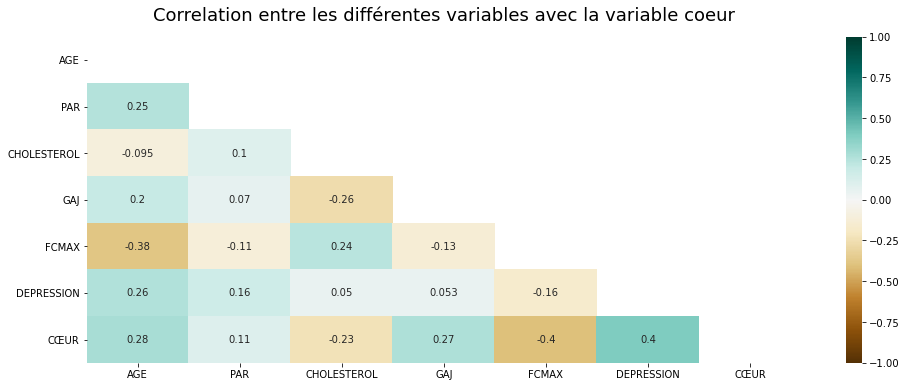

In [11]:
# test de correlation linéaire entre les différentes variables.
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation entre les différentes variables avec la variable coeur', fontdict={'fontsize':18}, pad=16);

     Le test  nous indique  d'extrême faibles correlations linéaire entre les variables.
     l'etude des variables avec la target nous permettra d'observer celles qui pouraient au mieux participer a la construction de notre modèles.

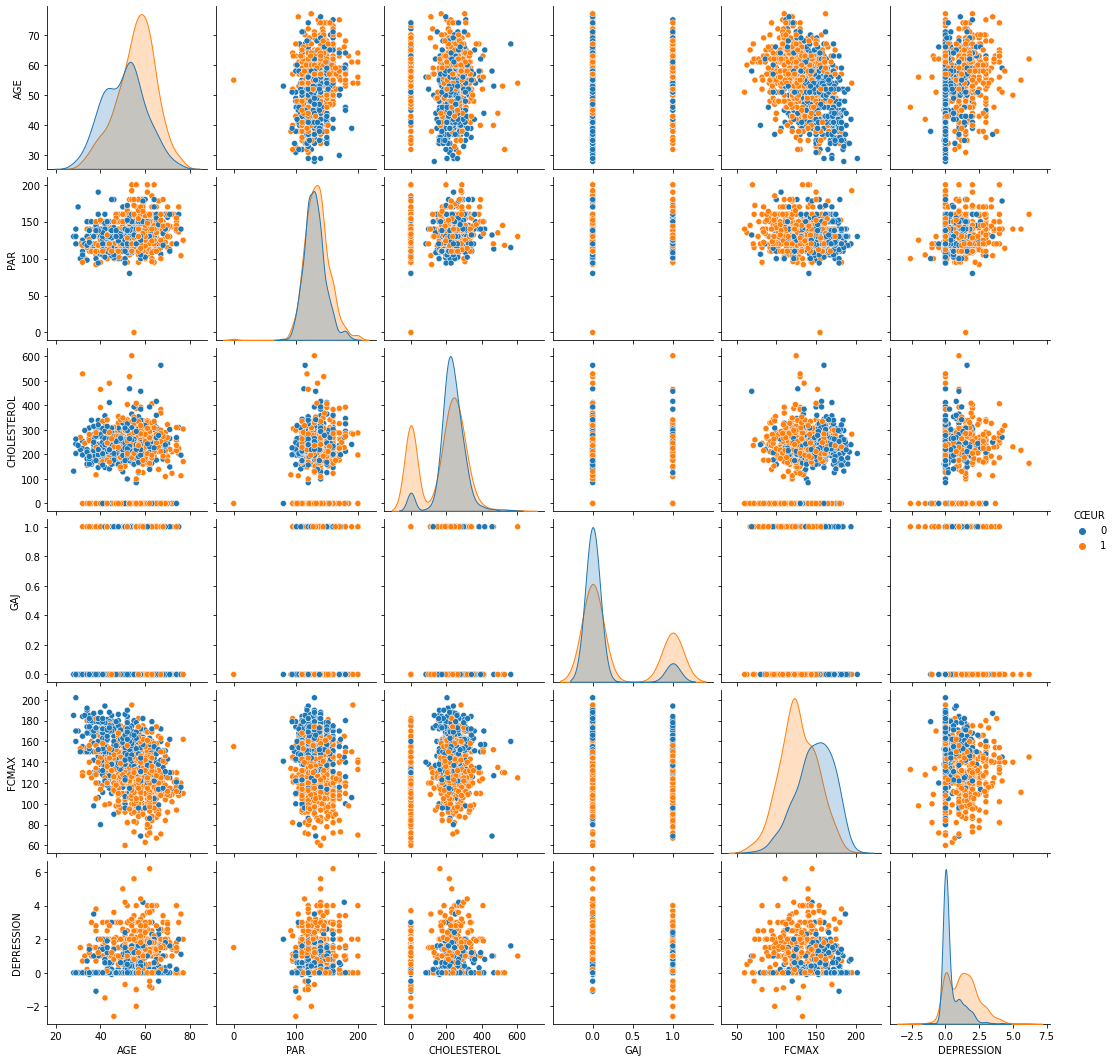

In [12]:
#Comparaison des variables quantitaives 
sns.pairplot(df[['AGE','PAR','CHOLESTEROL','GAJ','FCMAX','DEPRESSION','CŒUR']], hue='CŒUR');

      Du paiplot des variables quantitatives croisé deux a deux avec la variable cible, on observe les variables FCMAX, AGE, DEPRESSION, qui semble mieux discriminer la variable cible COEUR. 
      les autres variables ayant faiblement d'impact sur la variable     coeur.

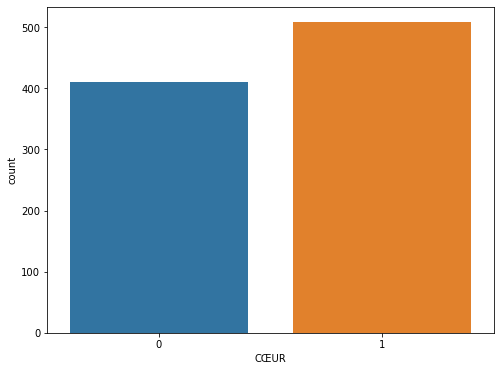

In [13]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x='CŒUR', data=df);

     Au sein de la population d'étude, on observe le nombre de personne malade supérieur de 100 a celui de personne bien portante. l'on peut en conclure sur cette population, les chance d'être malade indépendament des autres variables sontapproximativement les mêmes moyennant l'écart de 100.

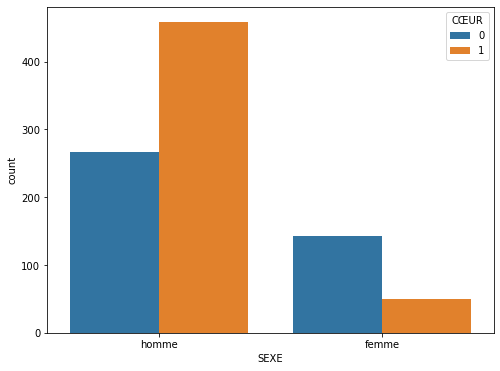

In [14]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(hue='CŒUR',x='SEXE', data=df);

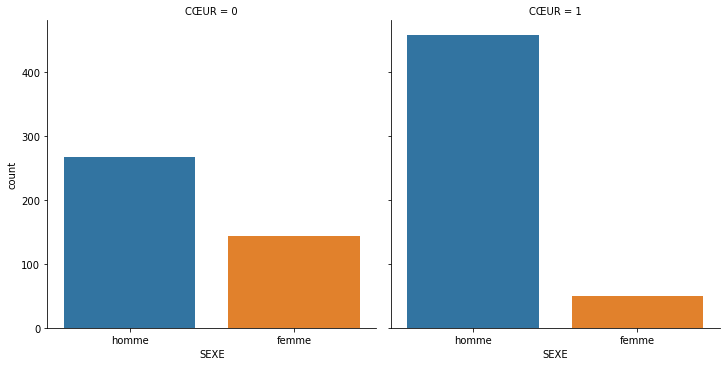

In [15]:
sns.catplot(x='SEXE', col='CŒUR', kind='count', data=df);

        On observe que l'on a plus de chance  de developper une maladie cardiaque étant un homme de cette population plus qu'une femme.

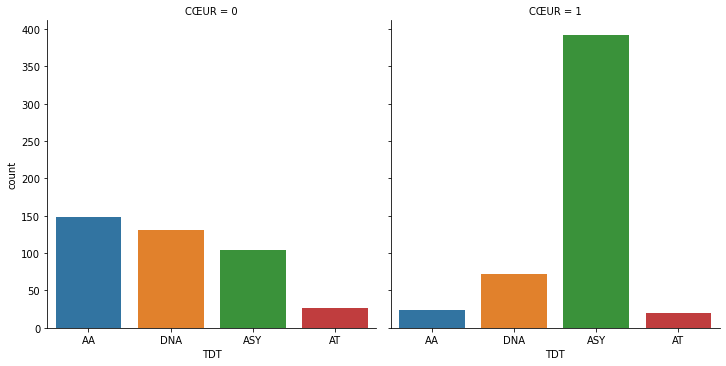

In [16]:
sns.catplot(x='TDT', col='CŒUR', kind='count', data=df);

         Les personnes malades on beacoupl plus de chance de developper le caractère ASY de la varible TDT que les personnes saine.

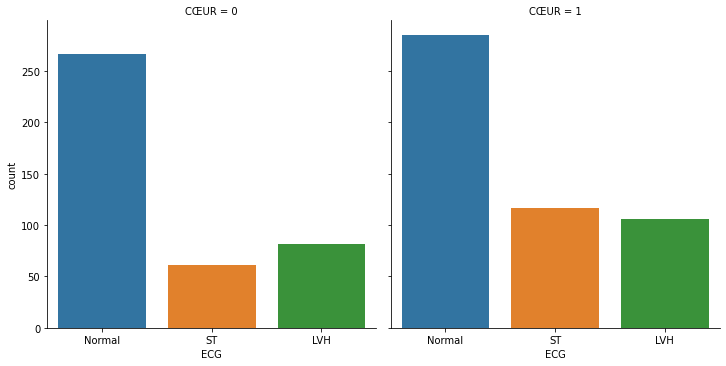

In [17]:
sns.catplot(x='ECG', col='CŒUR', kind='count', data=df);

       On peut observer que l'on soit malade ou pas, les chances d'appartenir a une classe ou autre de de l'ECG sont sensiblement les même avec une obsevation sur les segments ST et LVH élévé chez les personnes malades.

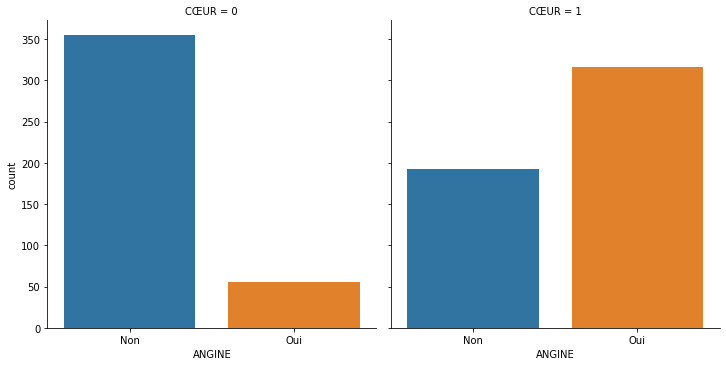

In [18]:
sns.catplot(x='ANGINE', col='CŒUR', kind='count', data=df);

      Les personnes malade on beacoup plus de chance de developper l'angine que les personnes saine

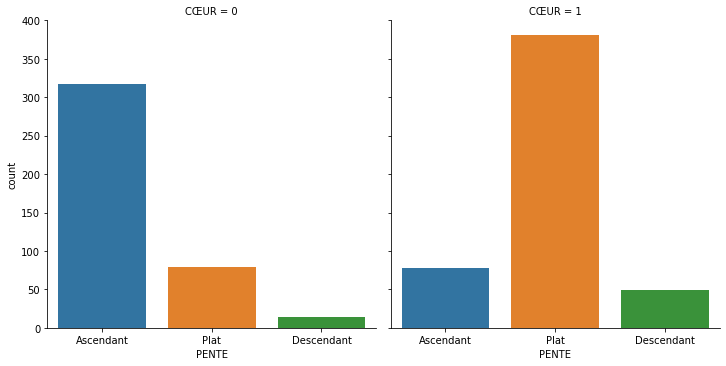

In [19]:
sns.catplot(x='PENTE', col='CŒUR', kind='count', data=df);

       Nous observons ici la pente du segment ST sur l'ECG, le constat est tel que les personne malades ont tendance a avoir une pente du Segment ST plate a contrario des personnes saine qui possèdent en majorité la pente ST ascendante.

#### Valeurs Extremes 

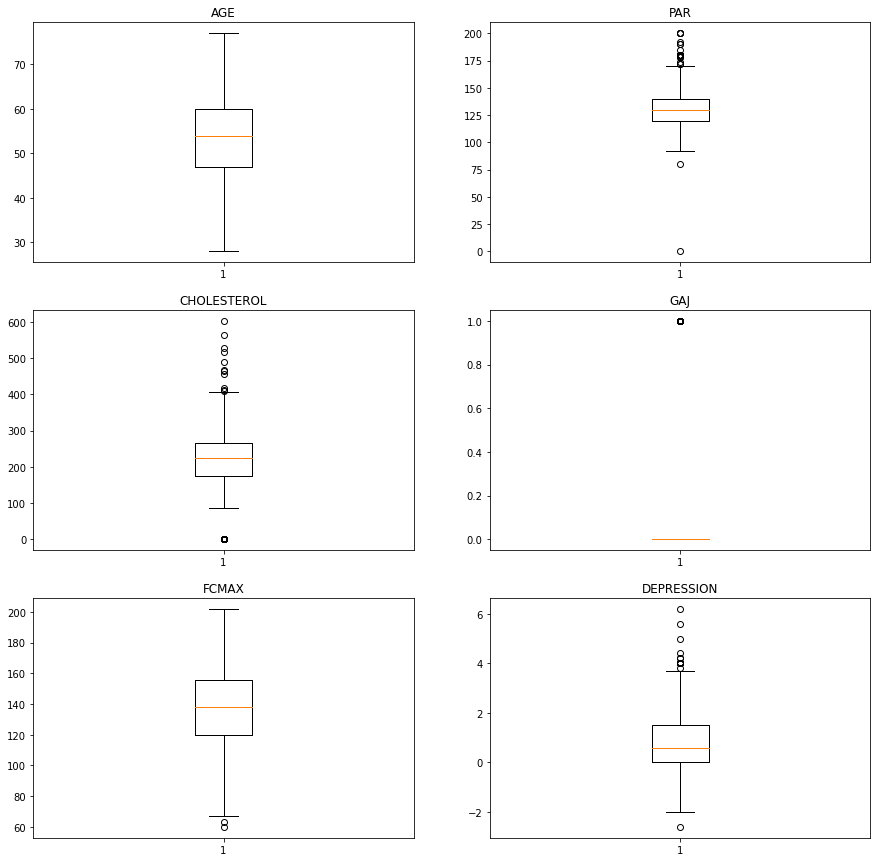

In [20]:
plt.rcParams["figure.figsize"] = 15, 15

fig, ax = plt.subplots(3, 2)

ax[0, 0].boxplot(df.AGE)
ax[0, 0].set_title("AGE", size = 12)

ax[0, 1].boxplot(df.PAR)
ax[0, 1].set_title("PAR", size = 12)

ax[1, 0].boxplot(df.CHOLESTEROL)
ax[1, 0].set_title("CHOLESTEROL", size = 12)

ax[1, 1].boxplot(df.GAJ)
ax[1, 1].set_title("GAJ", size = 12)

ax[2, 0].boxplot(df.FCMAX)
ax[2, 0].set_title("FCMAX", size = 12)

ax[2, 1].boxplot(df.DEPRESSION)
ax[2, 1].set_title("DEPRESSION", size = 12)

plt.show()

In [21]:
df['DEPRESSION'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.3      7
 2.6      7
 1.1      7
 1.9      7
 1.7      6
 2.2      5
 0.9      4
 3.6      4
 2.4      4
 3.4      3
 2.1      2
-0.1      2
 4.2      2
 3.2      2
 3.5      2
-0.5      2
 2.3      2
-1.0      2
 2.9      1
 3.8      1
-0.9      1
-2.6      1
-1.5      1
 3.7      1
 5.0      1
-2.0      1
-0.8      1
 3.1      1
 4.4      1
 5.6      1
 6.2      1
-0.7      1
-1.1      1
Name: DEPRESSION, dtype: int64

        
        Échelle de Dépression de Montgomery et Asberg (MADRS)
        c'est une échelle employée pour évaluer la sévérité de la dépression chez des patients souffrant de troubles de l'humeur. Elle est également fréquemment utilisée pour mesurer les changements apportés par le traitement de la dépression.
        
        Elle évalue la gravité des symptômes dans des domaines très variés tels que l'humeur, le sommeil et l'appétit, la fatigue physique et psychique et les idées de suicide.
        
        La cotation doit se fonder sur l'entretien clinique allant de questions générales sur les symptômes à des questions plus précises qui permettent une cotation exacte de la sévérité. Le cotateur doit décider si la note est à un point nettement défini de l'échelle (0, 2, 4, 6).
        
        les cas a observés seront les valeurs de depression inférieur a 0.

In [22]:
df['CHOLESTEROL'].value_counts()

0      172
254     11
223     10
220     10
211      9
      ... 
117      1
123      1
131      1
293      1
603      1
Name: CHOLESTEROL, Length: 222, dtype: int64

        Le taux normal de cholestérol varie selon le sexe. Chez l'homme, il doit être compris entre 2.84 et 4.13 mmol/l soit 1.10 à 1.60 g/l .Chez la femme, les valeurs normales sont comprises entre 2.58 et 3.87 mmol/l soit 1.00 à 1.50 g/l.
        
        il est impossible que des personnes aient des valeurs a 0, cela peux être du a des informations non renseignés.
        Pour les valeur supérieurs, il est possible que des personnes puissent avoir ces valeurs de cholestérol vu que 
        
        Lorsqu'on atteint 60 ans, la valeur normale de cholestérol HDL doit être comprise entre 0,40 et 0,68 g/l pour       l'homme, 0,60 et 0,94 g/l pour la femme.
        
      Le traitement sur les valeurs abérentes sera essentiellement fait sur les personnes ayant un taux de cholestérol a 0.

In [23]:
df['PAR'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
113      1
117      1
127      1
129      1
0        1
Name: PAR, Length: 67, dtype: int64

      la presseion artérielle étant observé entre les valeurs <100 et >180 , les valeurs supérieur a 180 peuvent être possible pour des personnes sévèrement hyper-tendu.
      
      les cas d'observation seront pour les personnes ayant une pression artérille proche de 0.



      Au terme de la première parties de l'EDA, l'on peut conclure que seul la variable ECG n'a pas grandement d'impact dans la discrimination de la variables Coeur.

###  Preprocession


       -Dans un premier temps nous allons monter un modèle de base avec toute les données y compris les valeurs supposées abérentes afin d'observer les premières performances du modèle et par la suite affiner en accentuants certains paramètres du pre-processing.

In [24]:
df1.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [25]:
#Dataset des variables quantitatives
df_quanti=df[['AGE','PAR','CHOLESTEROL','FCMAX','DEPRESSION']]

      la variable GAJ étant catégorielle, elle sera reseigner au niveau des variable qualitatives

In [26]:
#Dataset des variables qualitatives
df_quali=df[['SEXE','TDT','ECG','ANGINE','PENTE']]

In [27]:
#Dummies sur les variables quelitatives
df_quali=pd.get_dummies(df_quali)

In [28]:
#Ajout de la variable GAJ au dataset des variables qualitatives 
df_quali['GAJ']=df1['GAJ']

In [29]:
df_quali

,SEXE_femme,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Non,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,GAJ
0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0
1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
2,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
3,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
914,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1
915,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
916,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [30]:
import sklearn

In [31]:
from sklearn.preprocessing import RobustScaler

In [32]:
#Standardization en maintenant les indexes, utilisation du RobustScaler a caude des valeurs extrèmes observées.
stand = RobustScaler()
df_quanti = pd.DataFrame(stand.fit_transform(df_quanti), columns = df_quanti.columns)

df_quanti

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,-1.076923,0.5,0.704000,0.944444,-0.400000
1,-0.384615,1.5,-0.458667,0.500000,0.266667
2,-1.307692,0.0,0.640000,-1.111111,-0.400000
3,-0.461538,0.4,-0.096000,-0.833333,0.600000
4,0.000000,1.0,-0.298667,-0.444444,-0.400000
...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,-0.166667,0.400000
914,1.076923,0.7,-0.320000,0.083333,1.866667
915,0.230769,0.0,-0.981333,-0.638889,0.400000
916,0.230769,0.0,0.138667,1.000000,-0.400000


In [33]:
df_quanti['CŒUR']=df1['CŒUR']
df_quanti

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,CŒUR
0,-1.076923,0.5,0.704000,0.944444,-0.400000,0
1,-0.384615,1.5,-0.458667,0.500000,0.266667,1
2,-1.307692,0.0,0.640000,-1.111111,-0.400000,0
3,-0.461538,0.4,-0.096000,-0.833333,0.600000,1
4,0.000000,1.0,-0.298667,-0.444444,-0.400000,0
...,...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,-0.166667,0.400000,1
914,1.076923,0.7,-0.320000,0.083333,1.866667,1
915,0.230769,0.0,-0.981333,-0.638889,0.400000,1
916,0.230769,0.0,0.138667,1.000000,-0.400000,1


In [34]:
df_quali['CŒUR']=df1['CŒUR']
df_quali

,SEXE_femme,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Non,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,GAJ,CŒUR
0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0
1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1
2,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1
4,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1
914,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,1
915,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1
916,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1


In [35]:
#Concatenation des dataframe quanti et quali
df_quali.drop(['CŒUR'],axis=1,inplace=True)

In [36]:
df_final = pd.concat([df_quali, df_quanti], axis=1)

In [37]:
df_final

,SEXE_femme,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Non,...,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,GAJ,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,CŒUR
0,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,-1.076923,0.5,0.704000,0.944444,-0.400000,0
1,1,0,0,0,0,1,0,1,0,1,...,0,0,1,0,-0.384615,1.5,-0.458667,0.500000,0.266667,1
2,0,1,1,0,0,0,0,0,1,1,...,1,0,0,0,-1.307692,0.0,0.640000,-1.111111,-0.400000,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,-0.461538,0.4,-0.096000,-0.833333,0.600000,1
4,0,1,0,0,0,1,0,1,0,1,...,1,0,0,0,0.000000,1.0,-0.298667,-0.444444,-0.400000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,1,0,0,1,0,1,...,0,0,1,0,-0.692308,-1.0,0.437333,-0.166667,0.400000,1
914,0,1,0,1,0,0,0,1,0,1,...,0,0,1,1,1.076923,0.7,-0.320000,0.083333,1.866667,1
915,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0.230769,0.0,-0.981333,-0.638889,0.400000,1
916,1,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0.230769,0.0,0.138667,1.000000,-0.400000,1


In [38]:
df_y =df_final['CŒUR']
df_y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: CŒUR, Length: 918, dtype: int64

In [39]:
df_x=df_final.drop(['CŒUR'],axis=1)
df_x

,SEXE_femme,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Non,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,GAJ,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,-1.076923,0.5,0.704000,0.944444,-0.400000
1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,-0.384615,1.5,-0.458667,0.500000,0.266667
2,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,-1.307692,0.0,0.640000,-1.111111,-0.400000
3,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,-0.461538,0.4,-0.096000,-0.833333,0.600000
4,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0.000000,1.0,-0.298667,-0.444444,-0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,-0.692308,-1.0,0.437333,-0.166667,0.400000
914,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,1.076923,0.7,-0.320000,0.083333,1.866667
915,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0.230769,0.0,-0.981333,-0.638889,0.400000
916,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0.230769,0.0,0.138667,1.000000,-0.400000


### Modelisation et Evaluation du Modèle avec toute les variables exolicatives

##### test-1

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y, test_size=0.2)

In [41]:
print("x_train set : " ,x_train.shape)
print("x_test set : " ,x_test.shape)
print("y_train set : ", y_train.shape)
print("y_train set : ", y_test.shape)

x_train set :  (734, 20)
x_test set :  (184, 20)
y_train set :  (734,)
y_train set :  (184,)


In [42]:
#codification de y_train et y_test
y = y_train
y_train2 = np.array(y).astype(int)


y2 = y_test
y_test2 = np.array(y2).astype(int)


### Adaboost

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
adab = AdaBoostClassifier(n_estimators=100,random_state=0)

In [45]:
x_trainad,y_trainad=x_train,y_train2

In [46]:
adab.fit(x_trainad,y_trainad)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [47]:
y_pred_ad=adab.predict(x_test)
y_pred_ad

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1])

In [48]:
print('Train score :',adab.score(x_trainad,y_train2))
print('Test score :',adab.score(x_test,y_test2))

Train score : 0.896457765667575
Test score : 0.875


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
print(confusion_matrix(y_test2, y_pred_ad))
print(classification_report(y_test2, y_pred_ad))

[[69 14]
 [ 9 92]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        83
           1       0.87      0.91      0.89       101

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [51]:
#tracer de la courbe d'apprentissage
from sklearn.model_selection import learning_curve

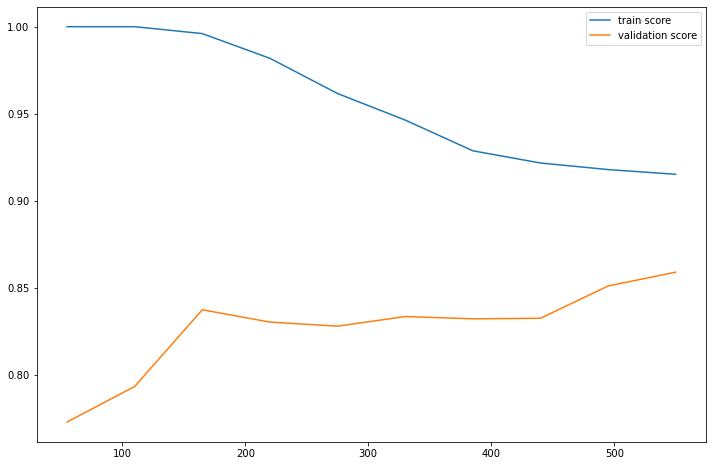

In [52]:
N, train_score, val_score = learning_curve(adab, x_trainad, y_trainad,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

### Gradiant Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gb=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [55]:
x_traingb,y_trainsgb=x_train,y_train2

In [56]:
gb.fit(x_traingb, y_trainsgb)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [57]:
y_predgb=gb.predict(x_test)
y_predgb

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1])

In [58]:
print('Train score :',gb.score(x_traingb,y_trainsgb))
print('Test score :',gb.score(x_test,y_test2))

Train score : 0.9155313351498637
Test score : 0.8858695652173914


In [59]:
print(confusion_matrix(y_test2, y_predgb))
print(classification_report(y_test2, y_predgb))

[[72 11]
 [10 91]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        83
           1       0.89      0.90      0.90       101

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



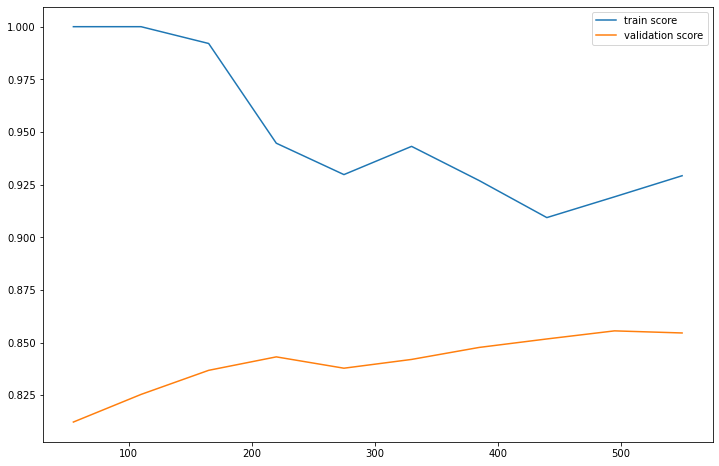

In [60]:
N, train_score, val_score = learning_curve(gb, x_traingb, y_trainsgb,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

### XGbost

In [61]:
#!pip install xgboost

In [62]:
import xgboost
from xgboost import XGBClassifier

In [63]:
xgbcla=XGBClassifier(n_estimators=100,max_depth=3,n_jobs=8,booster='gbtree',random_state=1,use_label_encoder = False)

In [64]:
x_trainxgbcla,y_trainxgbcla=x_train,y_train

In [65]:
xgbcla.fit(x_trainxgbcla, y_trainxgbcla)

[18:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [66]:
y_predxgbcla=xgbcla.predict(x_test)
y_predxgbcla

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1])

In [67]:
print('Train score :',xgbcla.score(x_trainxgbcla,y_trainxgbcla))
print('Test score :',xgbcla.score(x_test,y_test2))

Train score : 0.9863760217983651
Test score : 0.9184782608695652


In [68]:
print(confusion_matrix(y_test2, y_predxgbcla))
print(classification_report(y_test2, y_predxgbcla))

[[75  8]
 [ 7 94]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        83
           1       0.92      0.93      0.93       101

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



[18:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

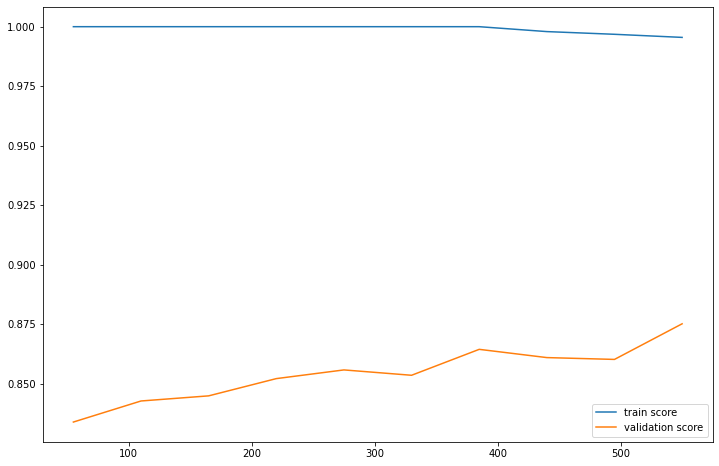

In [69]:
#un warning apparait a cause de la utilisé 
N, train_score, val_score = learning_curve(xgbcla, x_trainxgbcla, y_trainxgbcla,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

       Globalement sur les deux premiers modèles testé, on observe une différenece significative entre 8 et 10 % des performances des modèles.
       
       une transformation du modèle xgboost nous donne des performances de 91%
       
       Nous effectuerons un pré-processing plus affinés afin d'optimiser les performance des modèles.

##### test-2

      Approche avec Catboost en conservant les valeurs extremes 

In [70]:
import catboost as cb

In [71]:
traindata =cb.Pool(x_train,y_train) 
testdata = cb.Pool(x_test,y_test)

In [72]:
model = cb.CatBoostClassifier(random_state=42,objective= 'CrossEntropy',)

In [73]:
model.fit(x_train,y_train)

0:	learn: 0.6658253	total: 97.7ms	remaining: 1m 37s
1:	learn: 0.6426549	total: 106ms	remaining: 52.8s
2:	learn: 0.6201552	total: 113ms	remaining: 37.5s
3:	learn: 0.6004406	total: 119ms	remaining: 29.7s
4:	learn: 0.5821244	total: 126ms	remaining: 25s
5:	learn: 0.5621711	total: 130ms	remaining: 21.5s
6:	learn: 0.5479629	total: 133ms	remaining: 18.9s
7:	learn: 0.5327062	total: 136ms	remaining: 16.8s
8:	learn: 0.5183230	total: 138ms	remaining: 15.2s
9:	learn: 0.5061406	total: 141ms	remaining: 13.9s
10:	learn: 0.4917766	total: 144ms	remaining: 12.9s
11:	learn: 0.4804346	total: 146ms	remaining: 12.1s
12:	learn: 0.4691598	total: 149ms	remaining: 11.3s
13:	learn: 0.4564451	total: 152ms	remaining: 10.7s
14:	learn: 0.4465634	total: 154ms	remaining: 10.1s
15:	learn: 0.4366658	total: 157ms	remaining: 9.65s
16:	learn: 0.4280427	total: 160ms	remaining: 9.23s
17:	learn: 0.4186219	total: 162ms	remaining: 8.86s
18:	learn: 0.4115286	total: 165ms	remaining: 8.51s
19:	learn: 0.4030587	total: 167ms	remaini

196:	learn: 0.1555837	total: 757ms	remaining: 3.08s
197:	learn: 0.1547899	total: 761ms	remaining: 3.08s
198:	learn: 0.1541284	total: 765ms	remaining: 3.08s
199:	learn: 0.1526962	total: 769ms	remaining: 3.07s
200:	learn: 0.1519741	total: 773ms	remaining: 3.07s
201:	learn: 0.1517038	total: 777ms	remaining: 3.07s
202:	learn: 0.1513243	total: 782ms	remaining: 3.07s
203:	learn: 0.1509169	total: 785ms	remaining: 3.06s
204:	learn: 0.1507246	total: 790ms	remaining: 3.06s
205:	learn: 0.1501740	total: 793ms	remaining: 3.06s
206:	learn: 0.1493234	total: 796ms	remaining: 3.05s
207:	learn: 0.1485104	total: 799ms	remaining: 3.04s
208:	learn: 0.1484821	total: 801ms	remaining: 3.03s
209:	learn: 0.1482478	total: 806ms	remaining: 3.03s
210:	learn: 0.1472599	total: 809ms	remaining: 3.03s
211:	learn: 0.1469954	total: 813ms	remaining: 3.02s
212:	learn: 0.1461624	total: 820ms	remaining: 3.03s
213:	learn: 0.1456919	total: 826ms	remaining: 3.03s
214:	learn: 0.1451502	total: 831ms	remaining: 3.03s
215:	learn: 

369:	learn: 0.0938232	total: 1.26s	remaining: 2.14s
370:	learn: 0.0936636	total: 1.26s	remaining: 2.13s
371:	learn: 0.0932274	total: 1.26s	remaining: 2.13s
372:	learn: 0.0929409	total: 1.26s	remaining: 2.13s
373:	learn: 0.0925870	total: 1.27s	remaining: 2.12s
374:	learn: 0.0922185	total: 1.27s	remaining: 2.12s
375:	learn: 0.0919297	total: 1.27s	remaining: 2.11s
376:	learn: 0.0919167	total: 1.28s	remaining: 2.11s
377:	learn: 0.0917628	total: 1.28s	remaining: 2.1s
378:	learn: 0.0914518	total: 1.28s	remaining: 2.1s
379:	learn: 0.0914415	total: 1.28s	remaining: 2.1s
380:	learn: 0.0911995	total: 1.29s	remaining: 2.09s
381:	learn: 0.0909751	total: 1.29s	remaining: 2.08s
382:	learn: 0.0905259	total: 1.29s	remaining: 2.08s
383:	learn: 0.0903761	total: 1.29s	remaining: 2.08s
384:	learn: 0.0901738	total: 1.3s	remaining: 2.07s
385:	learn: 0.0899849	total: 1.3s	remaining: 2.07s
386:	learn: 0.0898069	total: 1.3s	remaining: 2.06s
387:	learn: 0.0895929	total: 1.3s	remaining: 2.06s
388:	learn: 0.08932

563:	learn: 0.0558143	total: 1.76s	remaining: 1.36s
564:	learn: 0.0555187	total: 1.76s	remaining: 1.36s
565:	learn: 0.0553220	total: 1.76s	remaining: 1.35s
566:	learn: 0.0550862	total: 1.77s	remaining: 1.35s
567:	learn: 0.0550079	total: 1.77s	remaining: 1.34s
568:	learn: 0.0549308	total: 1.77s	remaining: 1.34s
569:	learn: 0.0547751	total: 1.77s	remaining: 1.34s
570:	learn: 0.0545672	total: 1.78s	remaining: 1.33s
571:	learn: 0.0545395	total: 1.78s	remaining: 1.33s
572:	learn: 0.0543482	total: 1.78s	remaining: 1.33s
573:	learn: 0.0541063	total: 1.78s	remaining: 1.32s
574:	learn: 0.0539908	total: 1.79s	remaining: 1.32s
575:	learn: 0.0539077	total: 1.79s	remaining: 1.32s
576:	learn: 0.0538544	total: 1.79s	remaining: 1.31s
577:	learn: 0.0537080	total: 1.79s	remaining: 1.31s
578:	learn: 0.0536710	total: 1.79s	remaining: 1.3s
579:	learn: 0.0535755	total: 1.8s	remaining: 1.3s
580:	learn: 0.0533475	total: 1.8s	remaining: 1.3s
581:	learn: 0.0532399	total: 1.8s	remaining: 1.29s
582:	learn: 0.0532

777:	learn: 0.0359307	total: 2.27s	remaining: 647ms
778:	learn: 0.0358628	total: 2.27s	remaining: 644ms
779:	learn: 0.0358102	total: 2.27s	remaining: 641ms
780:	learn: 0.0356935	total: 2.27s	remaining: 638ms
781:	learn: 0.0356281	total: 2.28s	remaining: 635ms
782:	learn: 0.0355298	total: 2.28s	remaining: 631ms
783:	learn: 0.0354809	total: 2.28s	remaining: 628ms
784:	learn: 0.0354293	total: 2.28s	remaining: 625ms
785:	learn: 0.0354118	total: 2.29s	remaining: 622ms
786:	learn: 0.0353179	total: 2.29s	remaining: 619ms
787:	learn: 0.0352781	total: 2.29s	remaining: 616ms
788:	learn: 0.0352402	total: 2.29s	remaining: 613ms
789:	learn: 0.0351890	total: 2.29s	remaining: 610ms
790:	learn: 0.0351618	total: 2.3s	remaining: 607ms
791:	learn: 0.0350670	total: 2.3s	remaining: 604ms
792:	learn: 0.0349920	total: 2.3s	remaining: 601ms
793:	learn: 0.0348740	total: 2.31s	remaining: 598ms
794:	learn: 0.0347829	total: 2.31s	remaining: 595ms
795:	learn: 0.0347016	total: 2.31s	remaining: 592ms
796:	learn: 0.0

985:	learn: 0.0263678	total: 2.77s	remaining: 39.4ms
986:	learn: 0.0263482	total: 2.77s	remaining: 36.6ms
987:	learn: 0.0263288	total: 2.78s	remaining: 33.7ms
988:	learn: 0.0262774	total: 2.78s	remaining: 30.9ms
989:	learn: 0.0262466	total: 2.78s	remaining: 28.1ms
990:	learn: 0.0261796	total: 2.79s	remaining: 25.3ms
991:	learn: 0.0261778	total: 2.79s	remaining: 22.5ms
992:	learn: 0.0261767	total: 2.79s	remaining: 19.7ms
993:	learn: 0.0261336	total: 2.79s	remaining: 16.9ms
994:	learn: 0.0260925	total: 2.79s	remaining: 14ms
995:	learn: 0.0260571	total: 2.8s	remaining: 11.2ms
996:	learn: 0.0260052	total: 2.8s	remaining: 8.42ms
997:	learn: 0.0259626	total: 2.8s	remaining: 5.62ms
998:	learn: 0.0259311	total: 2.8s	remaining: 2.81ms
999:	learn: 0.0258523	total: 2.81s	remaining: 0us


In [74]:
pred = model.predict(x_test)

In [75]:
from sklearn import metrics

In [76]:
model.score(x_test,y_test)

0.9239130434782609

In [77]:
print(metrics.classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        83
           1       0.92      0.94      0.93       101

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



       On observe les modèle xgboost et catboost nous donne   93% F1 Score pour les personne atteinte de trouble cardiaque 

       xgboost donne  93% recall pour les personne atteinte de trouble cardiaque , tandis que le modèle catboost donne 94% .
       
       NB: nous précisons ces métrics obtenus en maitenant les individus aux valeurs extremes dans le dataset.
       
       -les traitements a venir seront de les retirer et observer le comportement des différents modèles
       - pour chaque variables contenant les valeurs abérentes en valeur inférieur, traiter les différents cas.